nltk `pip install nltk`

In [1]:
import nltk

nltk.download()

text = "Hello, world! This is a test sentence."
tokens = nltk.word_tokenize(text)
print(tokens)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['Hello', ',', 'world', '!', 'This', 'is', 'a', 'test', 'sentence', '.']


In [2]:
tokens

['Hello', ',', 'world', '!', 'This', 'is', 'a', 'test', 'sentence', '.']

In [3]:
type(tokens)

list

gensim
`pip install gensim`

In [4]:
from gensim.utils import simple_preprocess

simple_preprocess(text)  # 소문자 변환, 토큰화, 특수문자 제거

['hello', 'world', 'this', 'is', 'test', 'sentence']

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt # pip install konlpy

In [9]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [10]:
train_data.shape

(200000, 3)

In [11]:
type(train_data)

pandas.core.frame.DataFrame

In [12]:
train_data['document'][0]  # 첫번째 리뷰 출력

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ'

In [13]:
train_data.dropna(how='any') # Null 값이 존재하는 행 제거
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [15]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  # 한글과 공백을 제외한 모든 글자 제거
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [ ]:
# 토큰화 및 불용어 제거
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    tokenized_sentence = okt.morphs(sentence, stem=True)  # 토큰화
    tokenized_sentence = [word for word in tokenized_sentence if not word in stopwords]  # 불용어 제거
    tokenized_data.append(tokenized_sentence)

tokenized_data

KoNLPy의 Okt 형태소 분석기는 Java로 만들어졌기 때문에, 파이썬에서 이를 사용하려면 시스템에 Java가 반드시 설치되어 있어야 함.

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5,
workers = 4, sg = 0)
print(model.wv.vectors.shape)

In [ ]:
print(model.wv.most_similar("한석규"))


pyNLPL `pip install pynlpl`

In [17]:
from pynlpl import textprocessors
text = "PyNLPI is a great library for natural language processing."
# 토큰화
tokens = textprocessors.crude_tokenizer(text)
print(tokens)

['PyNLPI', 'is', 'a', 'great', 'library', 'for', 'natural', 'language', 'processing', '.']


In [19]:
# N-gram extraction
for trigram in textprocessors.Windower(tokens,3):
    print(trigram)

('<begin>', '<begin>', 'PyNLPI')
('<begin>', 'PyNLPI', 'is')
('PyNLPI', 'is', 'a')
('is', 'a', 'great')
('a', 'great', 'library')
('great', 'library', 'for')
('library', 'for', 'natural')
('for', 'natural', 'language')
('natural', 'language', 'processing')
('language', 'processing', '.')
('processing', '.', '<end>')
('.', '<end>', '<end>')


SpaCy `pip install -U spacy`

In [ ]:
import spacy
from spacy.lang.ko.examples import sentences

# 한국어 모델 로드. `python -m spacy download ko_core_news_sm`로 설치 필요
nlp_ko = spacy.load('ko_core_news_sm')
nlp_ko

In [24]:
nlp_ko(sentences[0])

애플이 영국의 스타트업을 10억 달러에 인수하는 것을 알아보고 있다.

In [22]:
doc = nlp_ko(sentences[3])
print(doc.text) # 문장 예시 출력

런던은 영국의 수도이자 가장 큰 도시입니다.


In [25]:
for token in doc:
    print(f'{token.text:{12}} {token.pos_:{6}}')

런던은          PROPN 
영국의          PROPN 
수도이자         CCONJ 
가장           ADV   
큰            ADJ   
도시입니다        VERB  
.            PUNCT 


In [26]:
# 영어 모델 다운로드. `python -m spacy download en_core_web_sm`
nlp = spacy.load('en_core_web_sm')
text = 'Yuh-jung Youn won the Oscar for best supporting actress.'
doc = nlp(text)
print(f"{doc.text}")
tokenized = list(doc)
print(tokenized)

Yuh-jung Youn won the Oscar for best supporting actress.
[Yuh, -, jung, Youn, won, the, Oscar, for, best, supporting, actress, .]


In [27]:
for ent in doc.ents: # NER
    print(ent.text, ent.label_)

Yuh-jung Youn PERSON
Oscar PERSON


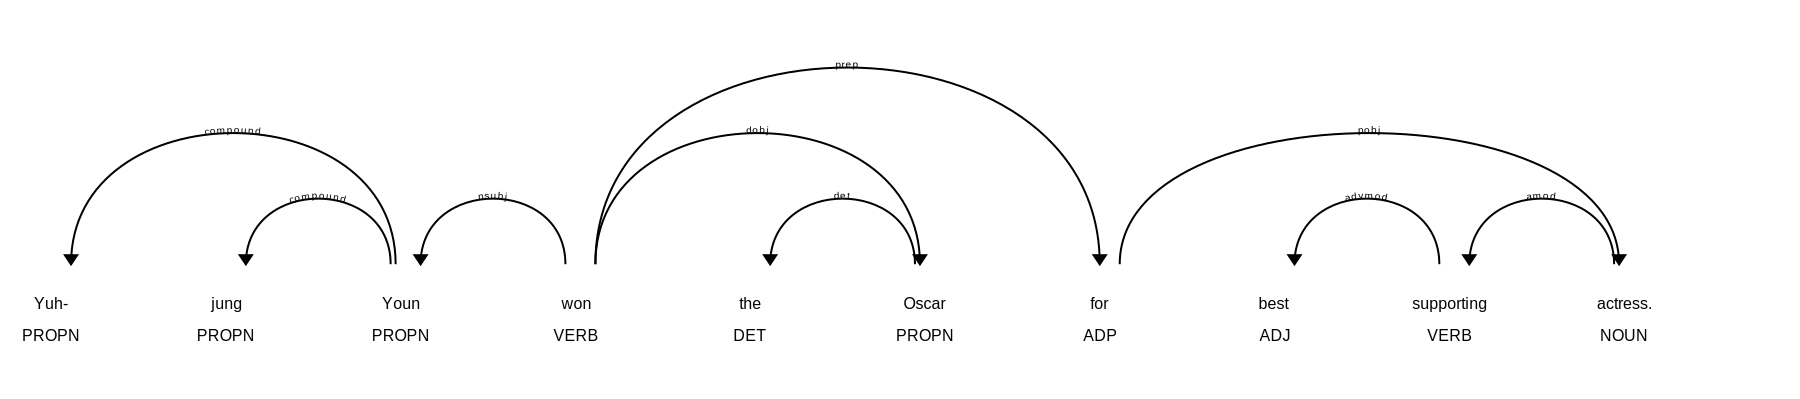

In [28]:
# 문장의 의존관계 출력
from IPython.display import SVG, display
from spacy import displacy

# render 시 jupyter=False 로 HTML 문자열만 반환
svg = displacy.render(doc, style='dep', jupyter=False)
display(SVG(svg))

transformers `pip install transformers`

In [1]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")
sentiment_analyzer

c:\Users\brigh\Documents\GitHub\warehouse\.venv\Lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

c:\Users\brigh\Documents\GitHub\warehouse\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\brigh\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [2]:
result = sentiment_analyzer("I love using Transformers library!")
print(f"{result}")

[{'label': 'POSITIVE', 'score': 0.9989345669746399}]


fairseq `pip install fairseq`

In [ ]:
from fairseq.models.roberta import RobertaModel
roberta = RobertaModel.from_pretrained('roberta.base')
tokens = roberta.encode("Natural language processing is fascinating.")
features = roberta.extract_features(tokens)
print(features)

fairseq는 잘 안씀.
transformers쓰자